The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


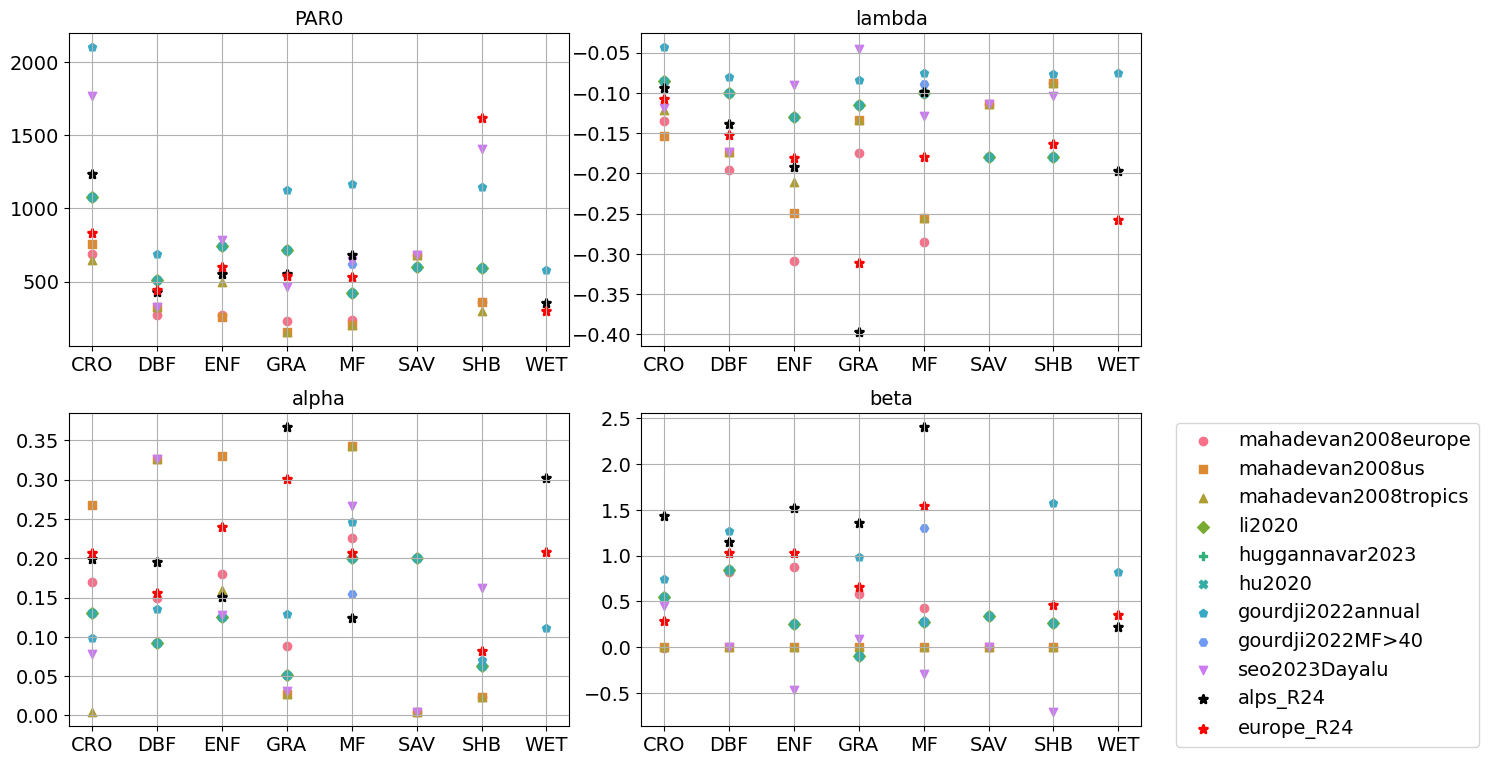

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

VPRM_old_or_new = "old"
run_ID = "diff_evo_V8_100"

with open("VPRM_all_params_literature_old_no_callewaert.csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)

df_tuned_alps = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -1
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)

df_tuned_europe = pd.read_csv("Europe_parameters_median_old_Europe_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_europe.drop(index=df_tuned_europe[df_tuned_europe['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_europe['Parameter'] = df_tuned_europe['Parameter'].replace({'lambd': 'lambda'})
df_tuned_europe.loc[df_tuned_europe['Parameter'] == 'lambda', df_tuned_europe.columns != 'Parameter'] *= -1
df_tuned_europe.set_index(df_tuned_europe.columns[0], inplace=True)
df_tuned_europe.sort_index(axis=1, inplace=True)


params = ['PAR0', 'lambda', 'alpha', 'beta']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

font_size = 14
fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
        ax.grid(True)
    # Plot df_tuned_alps using thick black horizontal line as a marker
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.scatter(df_tuned_europe.columns, df_tuned_europe.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.set_title(param, fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



In [27]:
# import csv

# # Transposed data
# data = [
#     ["gourdji2022", "DBF", "MF>40°N", "MF<40°N", "SHB", "GRA", "WET", "CRO", "CRC"],
#     ["Tmin", 0, 0, 0, 0, 0, 0, 0, 0],
#     ["Tmax", 45, 45, 45, 45, 45, 45, 45, 45],
#     ["Topt", 23, 18, 20, 7, 20, 29, 26, 35],
#     ["Tcrit", -15, 1, 0, 5, 1, 6, 7, -1],
#     ["Tmult", 0.55, 0.05, 0, 0.41, 0.14, 0.14, 0.05, 0],
#     ["lambda", -0.1023, -0.1097, -0.092, -0.0996, -0.1273, -0.1227, -0.0732, -0.0997],
#     ["PAR0", 539, 506, 896, 811, 673, 456, 1019, 1829],
#     ["beta", 0.12, 0.47, 0.28, 1.53, -6.18, -0.82, -1.20, -0.02],
#     ["alpha1", 0.065, 0.088, 0.025, 0.004, 0.853, 0.261, 0.234, 0.083],
#     ["alpha2", 0.0024, 0.0047, 0.0058, 0.0049, -0.025, -0.0051, -0.006, -0.0018],
#     ["gamma", 4.61, 1.39, 4.18, 0.09, 5.19, 3.46, 3.85, 4.89],
#     ["theta1", 0.116, -0.53, -0.729, -1.787, 1.749, -0.7, 0.032, 0.150],
#     ["theta2", -0.0005, 0.2063, 0.1961, 0.4537, -0.2829, 0.099, -0.0429, -0.1324],
#     ["theta3", 0.0009, -0.0054, -0.0055, -0.0138, 0.0166, 0.0018, 0.009, 0.0156]
# ]

# # Write to CSV
# with open('parameters_literature_VPRM_new.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerows(data)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

VPRM_old_or_new = "new"
run_ID = "diff_evo_V8_100"

with open("VPRM_all_params_literature_"+VPRM_old_or_new+".csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)
    


In [29]:
# Alps_parameters_mean_new_Alps_VPRM_optimized_params_diff_evo_V4_100
# Alps_parameters_mean_new_Europe_VPRM_optimized_params_diff_evo_V4_100.csv'

df_tuned_alps = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID+".csv")
#df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -1
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)
#
df_tuned_europe = pd.read_csv("Europe_parameters_median_"+VPRM_old_or_new+"_Europe_VPRM_optimized_params_"+run_ID+".csv")
#df_tuned_europe.drop(index=df_tuned_europe[df_tuned_europe['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_europe['Parameter'] = df_tuned_europe['Parameter'].replace({'lambd': 'lambda'})
df_tuned_europe.loc[df_tuned_europe['Parameter'] == 'lambda', df_tuned_europe.columns != 'Parameter'] *= -1
df_tuned_europe.set_index(df_tuned_europe.columns[0], inplace=True)
df_tuned_europe.sort_index(axis=1, inplace=True)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


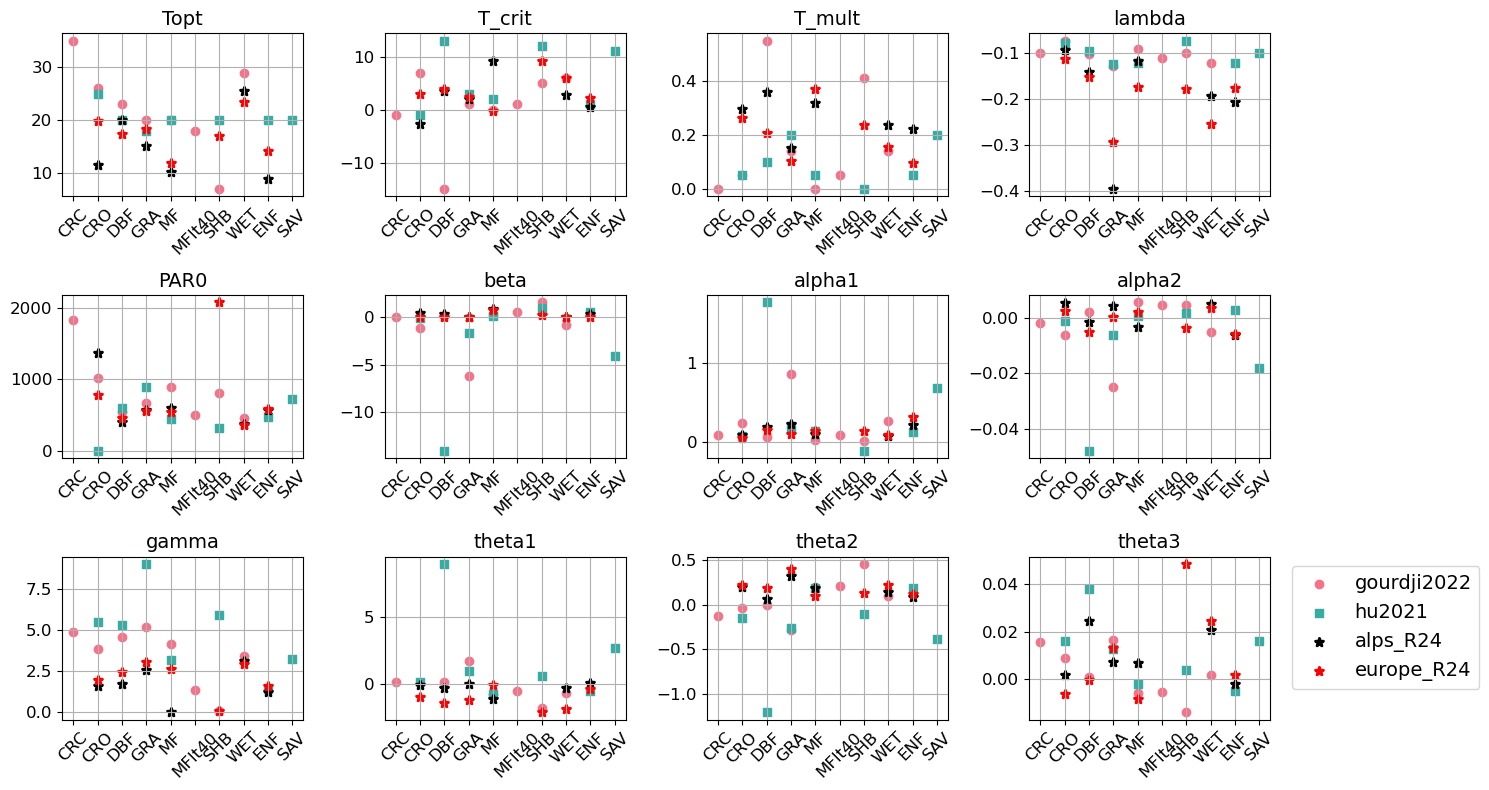

In [31]:


params = ['Topt','T_crit', 'T_mult', 'lambda', 'PAR0', 'beta','alpha1', 'alpha2', 'gamma', 'theta1', 'theta2', 'theta3']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']




fig, axes = plt.subplots(3, 4, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    # Plot df_tuned_alps using thick black horizontal line as a marker
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.scatter(df_tuned_europe.columns, df_tuned_europe.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(param, fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size-2)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

